In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [4]:
data=pd.read_csv('ToyotaCorolla.csv', encoding ='latin1')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [7]:
toyoto=pd.concat([data.iloc[:,2:4],data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]],axis=1)

In [8]:
toyoto

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [9]:
toyoto[toyoto.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [10]:
toyoto1=toyoto.drop_duplicates().reset_index(drop=True)

In [11]:
toyoto1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [12]:
toyoto=toyoto1.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis=1)

In [13]:
toyoto

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [14]:
#Correlation
toyoto.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


C:\Users\MD SUFIYA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


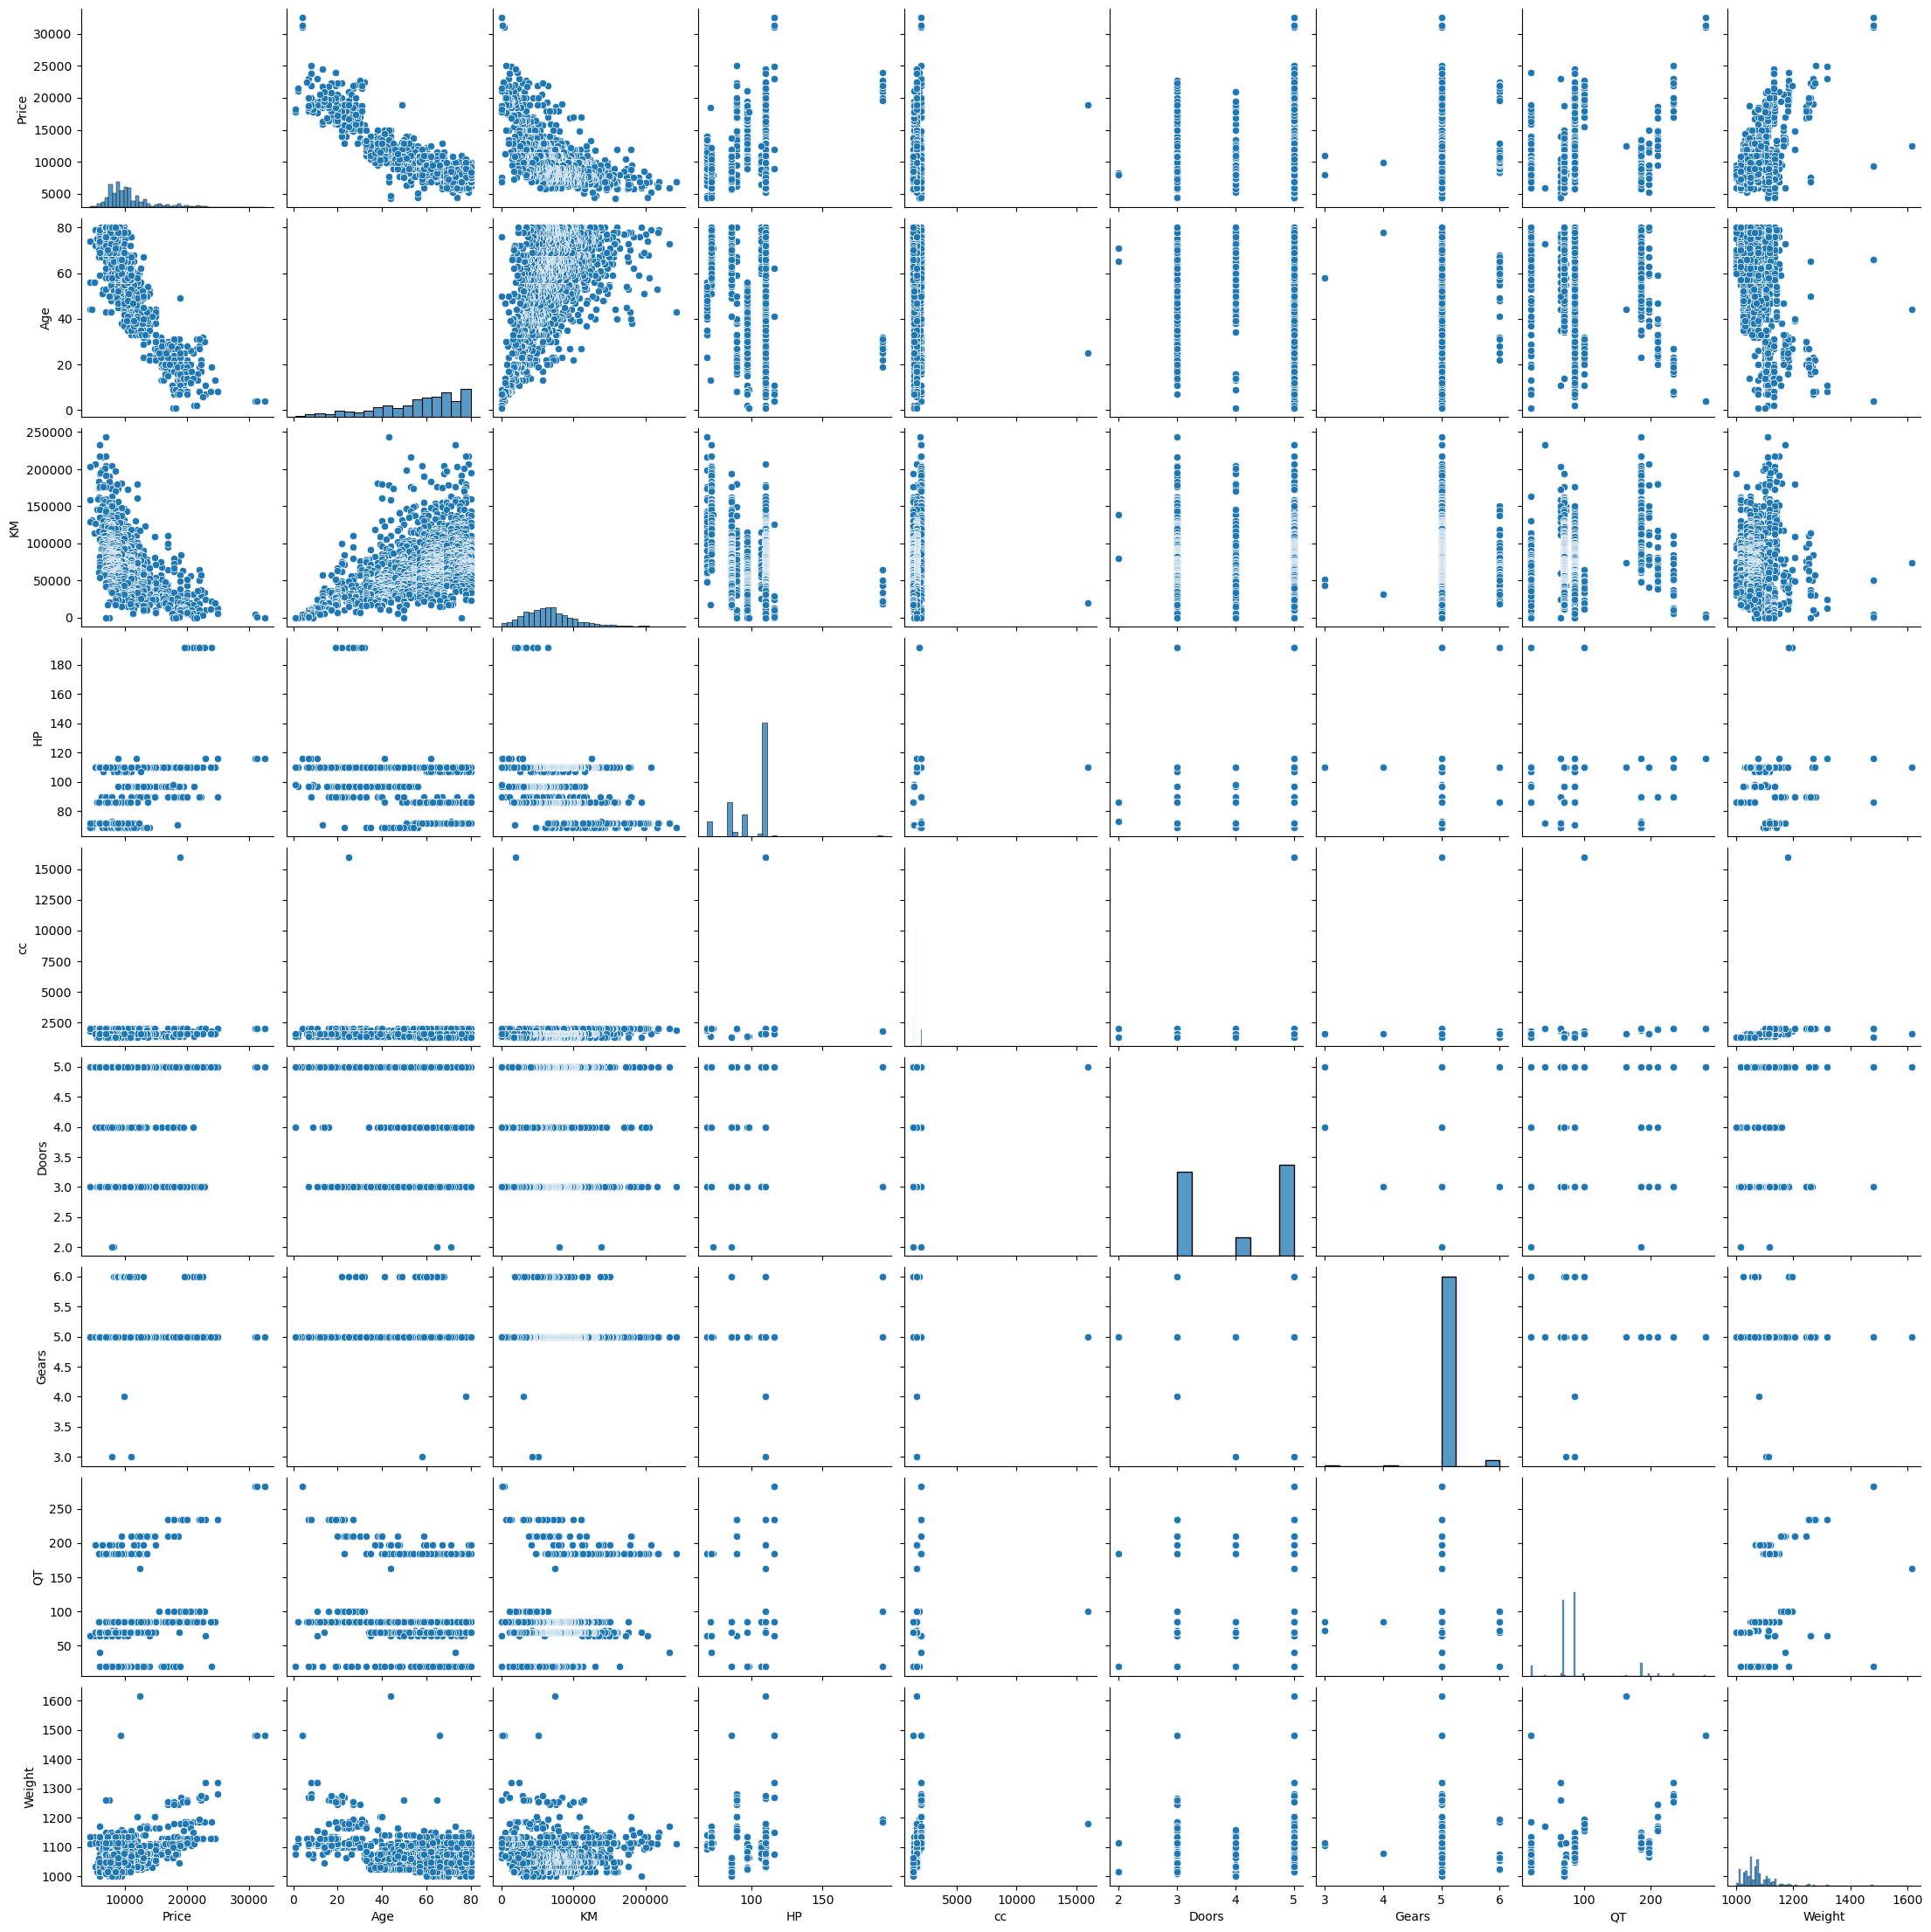

In [15]:
sns.pairplot(toyoto)

# Building a model

In [17]:
import statsmodels.formula.api as smf
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyoto).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:06:49   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#Coefficients
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [20]:
#t and p values
print(model.pvalues,model.tvalues)

Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
cc            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64 Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
cc           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64


In [21]:
#r squared values
model.rsquared,model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

# Simple Linear Regression Models

In [24]:
model_age=smf.ols('Price~Age',data=toyoto).fit()
model_age.pvalues,model_age.tvalues

(Intercept    0.0
 Age          0.0
 dtype: float64,
 Intercept    138.818198
 Age          -68.846693
 dtype: float64)

In [25]:
model_KM=smf.ols('Price~KM',data=toyoto).fit()
model_KM.pvalues,model_KM.tvalues

(Intercept     0.000000e+00
 KM           4.117214e-124
 dtype: float64,
 Intercept    88.643156
 KM          -26.221579
 dtype: float64)

In [26]:
model_weight=smf.ols('Price~Weight',data=toyoto).fit()
model_weight.pvalues,model_weight.tvalues

(Intercept     2.951487e-78
 Weight       1.547077e-127
 dtype: float64,
 Intercept   -19.937904
 Weight       26.664730
 dtype: float64)

In [27]:
model1=smf.ols('Price~Age+KM+Weight',data=toyoto).fit()
model1.pvalues,model1.tvalues

(Intercept     7.506510e-02
 Age          3.369009e-267
 KM            3.128234e-79
 Weight       1.322875e-100
 dtype: float64,
 Intercept    -1.781364
 Age         -43.881165
 KM          -20.082874
 Weight       23.100775
 dtype: float64)

# VIF 

In [31]:
rsq_age = smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Weight',data=toyoto).fit().rsquared  
vif_age = 1/(1-rsq_age)

rsq_km=smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Weight',data=toyoto).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP~KM+Age+cc+Doors+Gears+QT+Weight',data=toyoto).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('cc~KM+HP+Age+Doors+Gears+QT+Weight',data=toyoto).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_doors=smf.ols('Doors~KM+HP+cc+Age+Gears+QT+Weight',data=toyoto).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_gears=smf.ols('Gears~KM+HP+cc+Doors+Age+QT+Weight',data=toyoto).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_qt=smf.ols('QT~KM+HP+cc+Doors+Gears+Age+Weight',data=toyoto).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_weight=smf.ols('Weight~KM+HP+cc+Doors+Gears+QT+Age',data=toyoto).fit().rsquared
vif_weight=1/(1-rsq_weight)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','QT','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_age]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,1.876236


# Residual Analysis

# Q-Q Plot

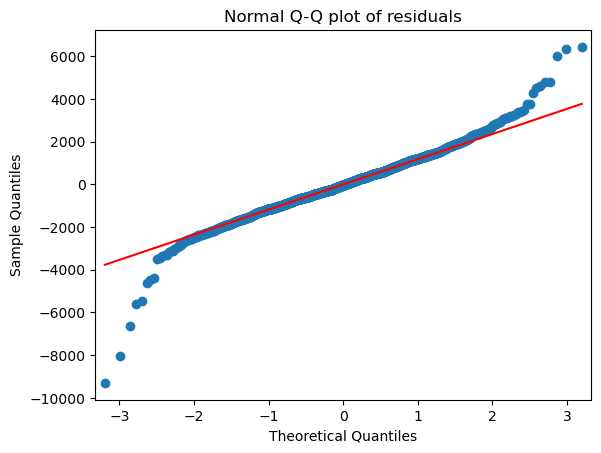

In [33]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [36]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

# Residual Plot For Homoscedasticity

In [38]:
def get_standardized_vals(vals):
    return((vals-vals.mean())/vals.std())

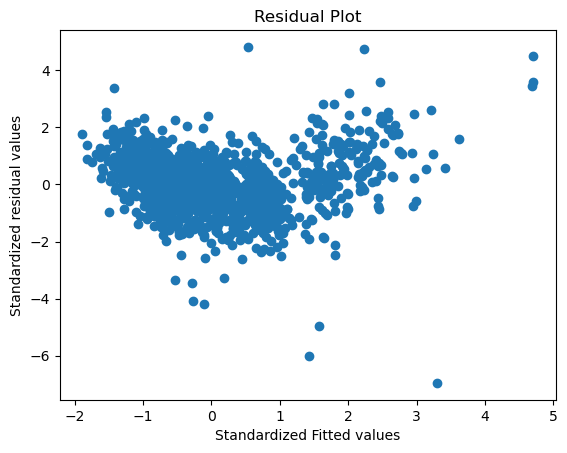

In [39]:
plt.scatter(get_standardized_vals(model.fittedvalues),get_standardized_vals(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

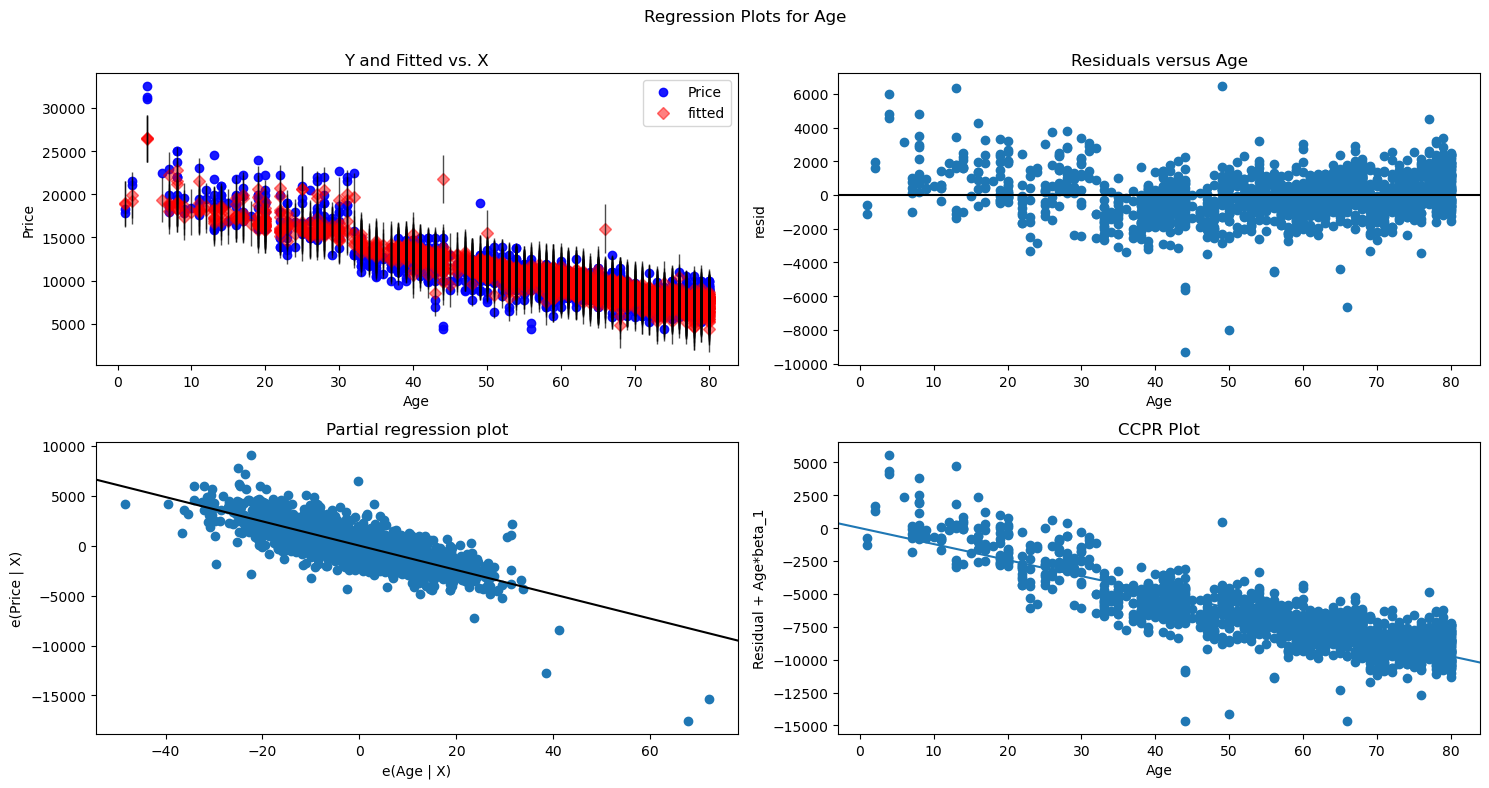

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

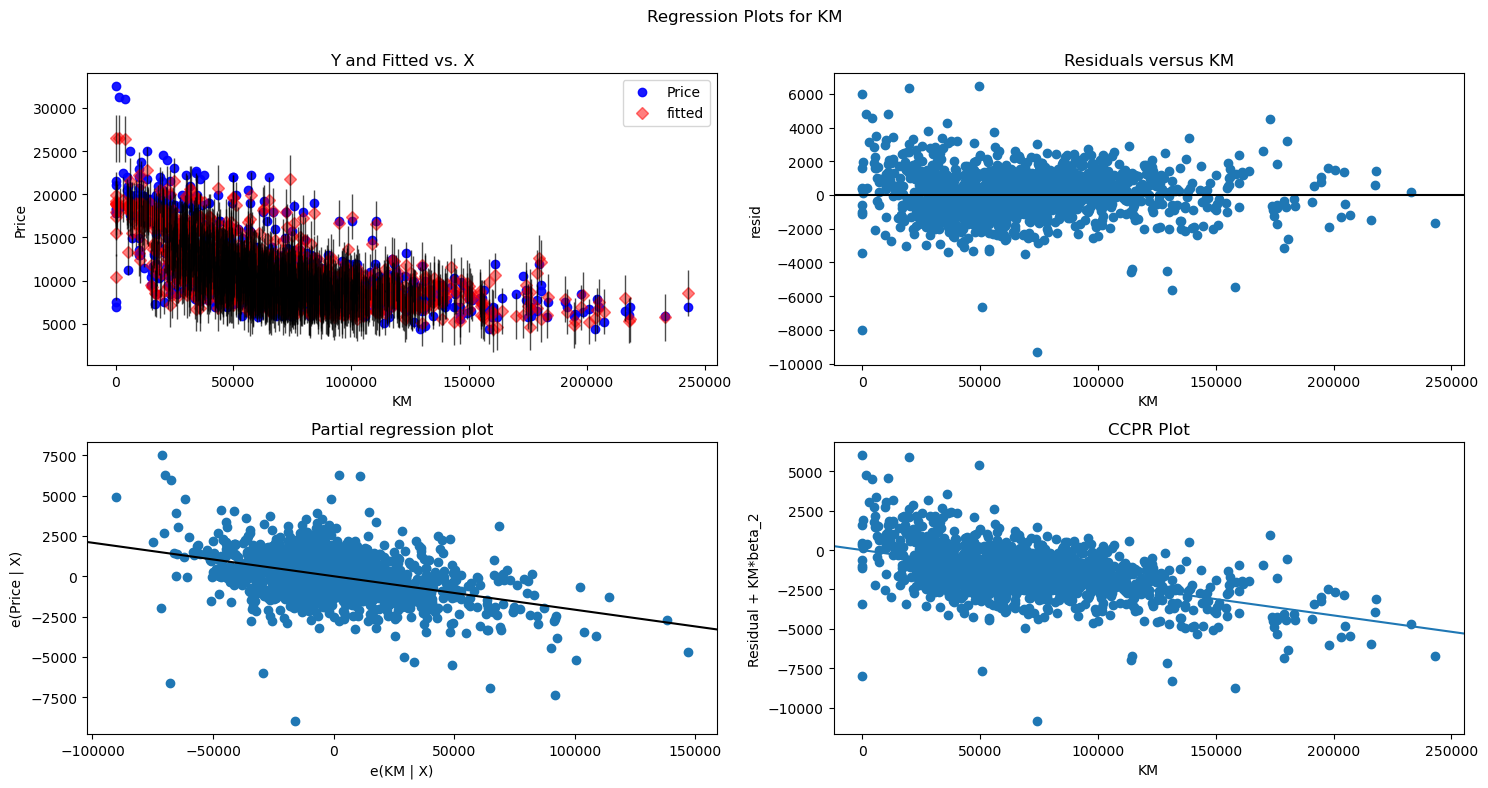

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

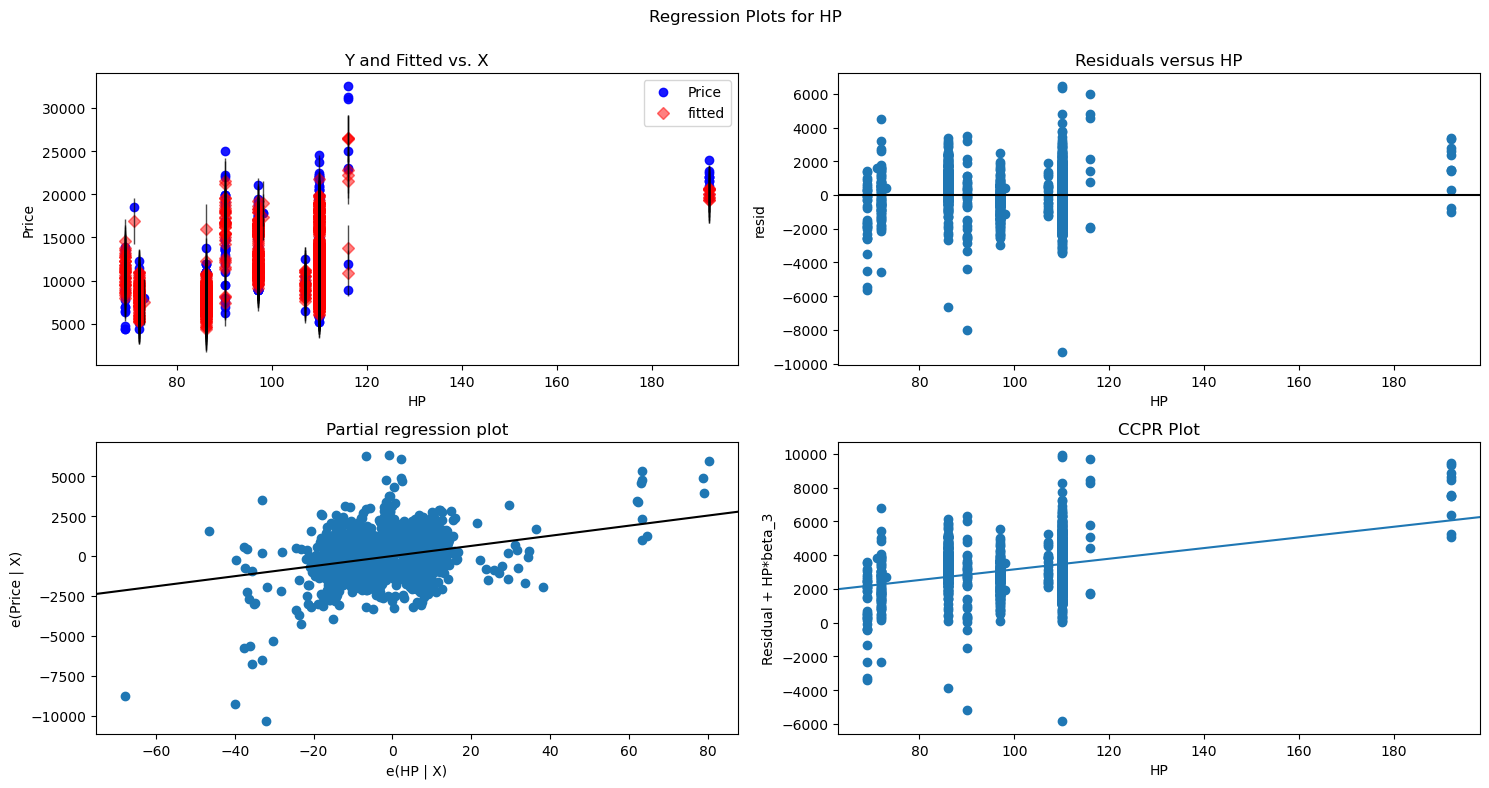

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

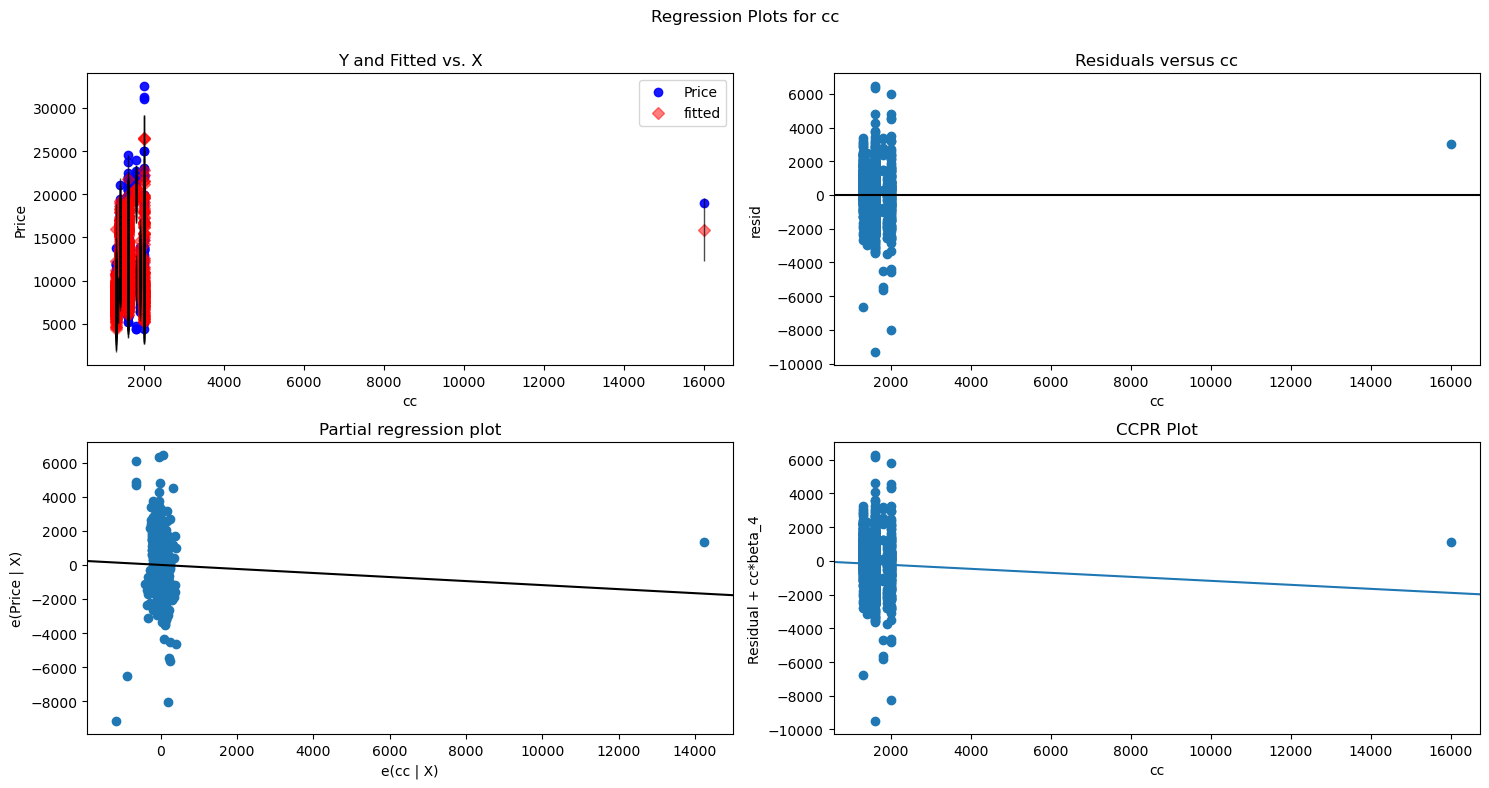

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

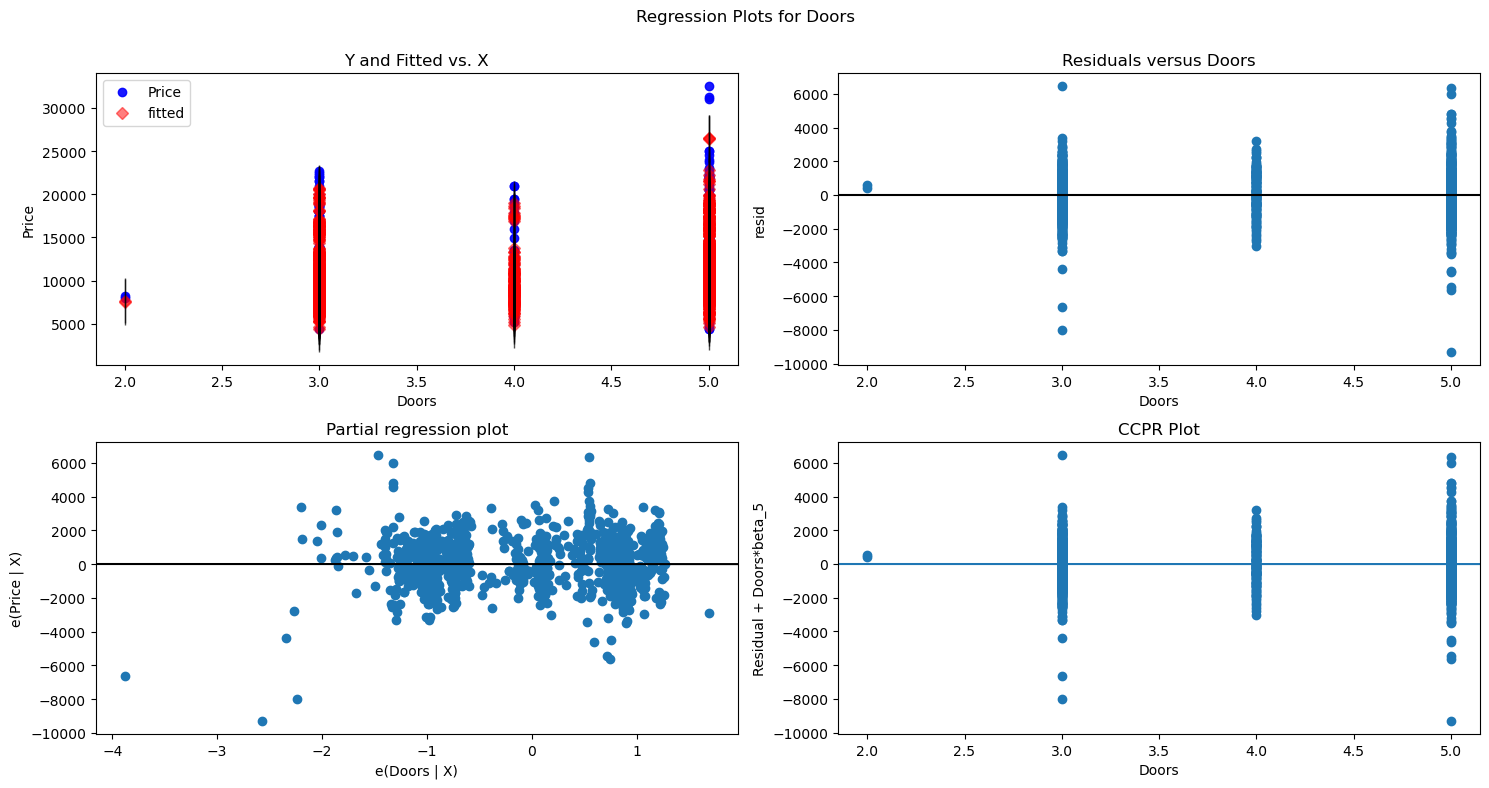

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

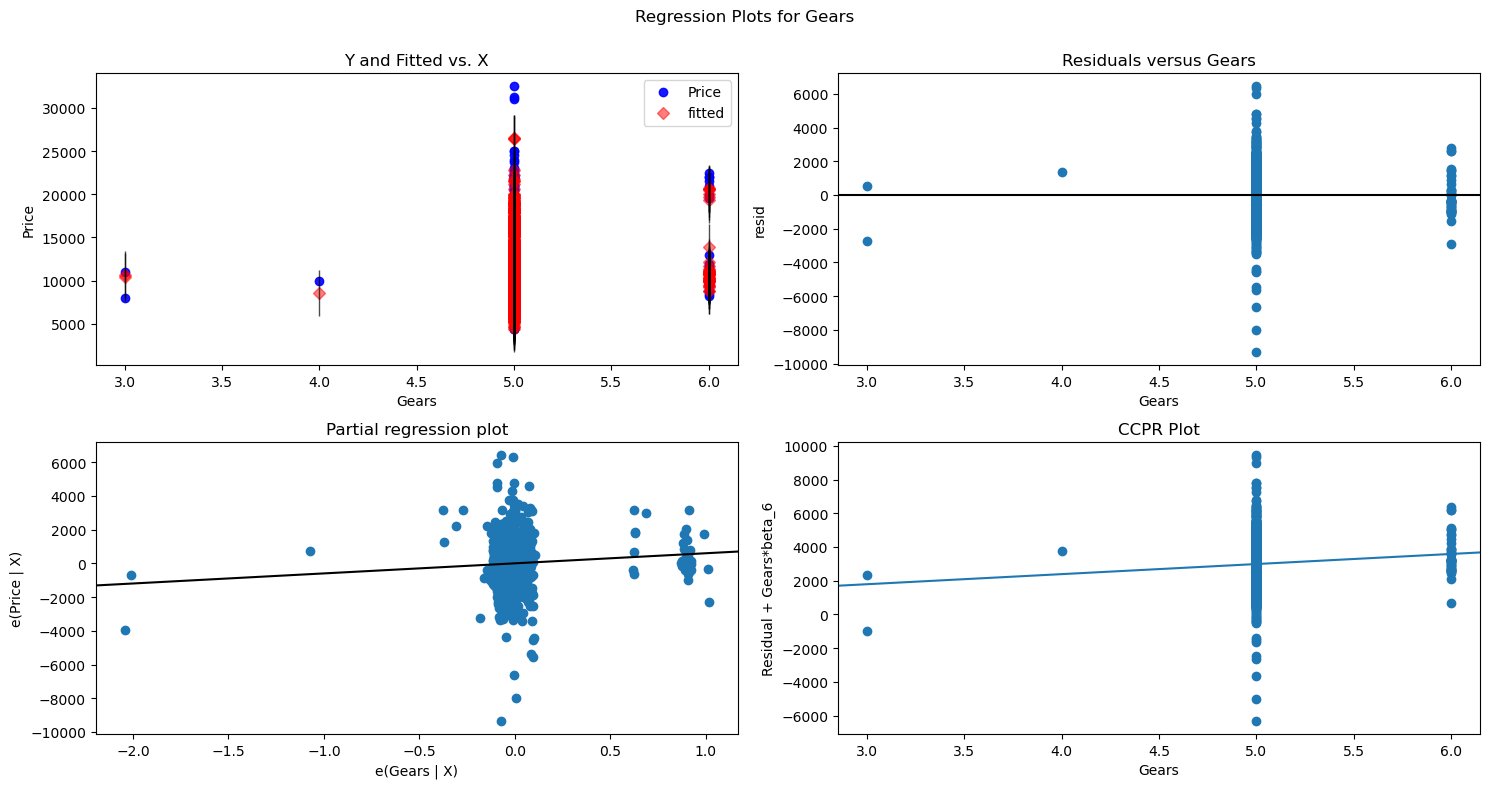

In [46]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

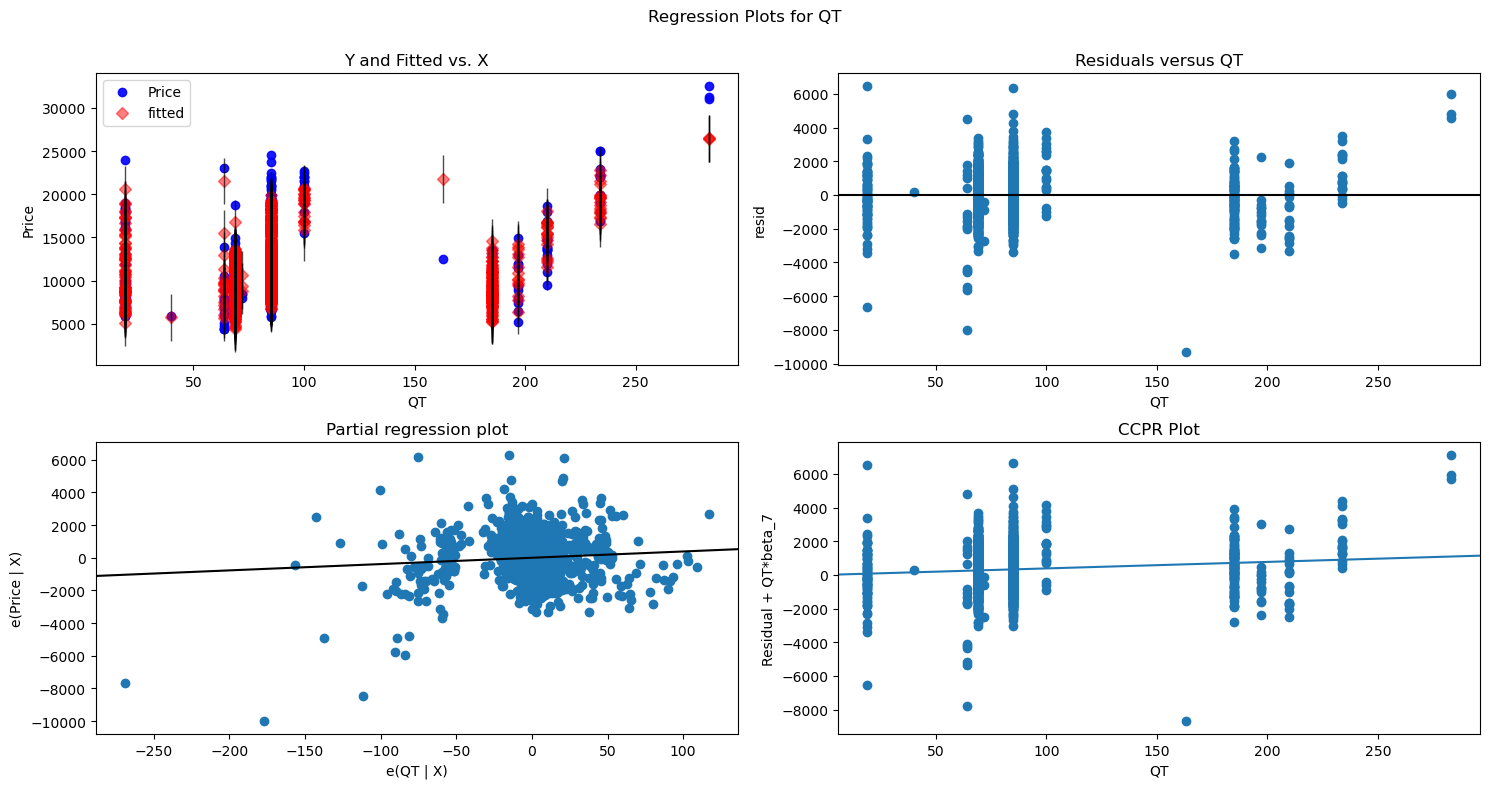

In [48]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

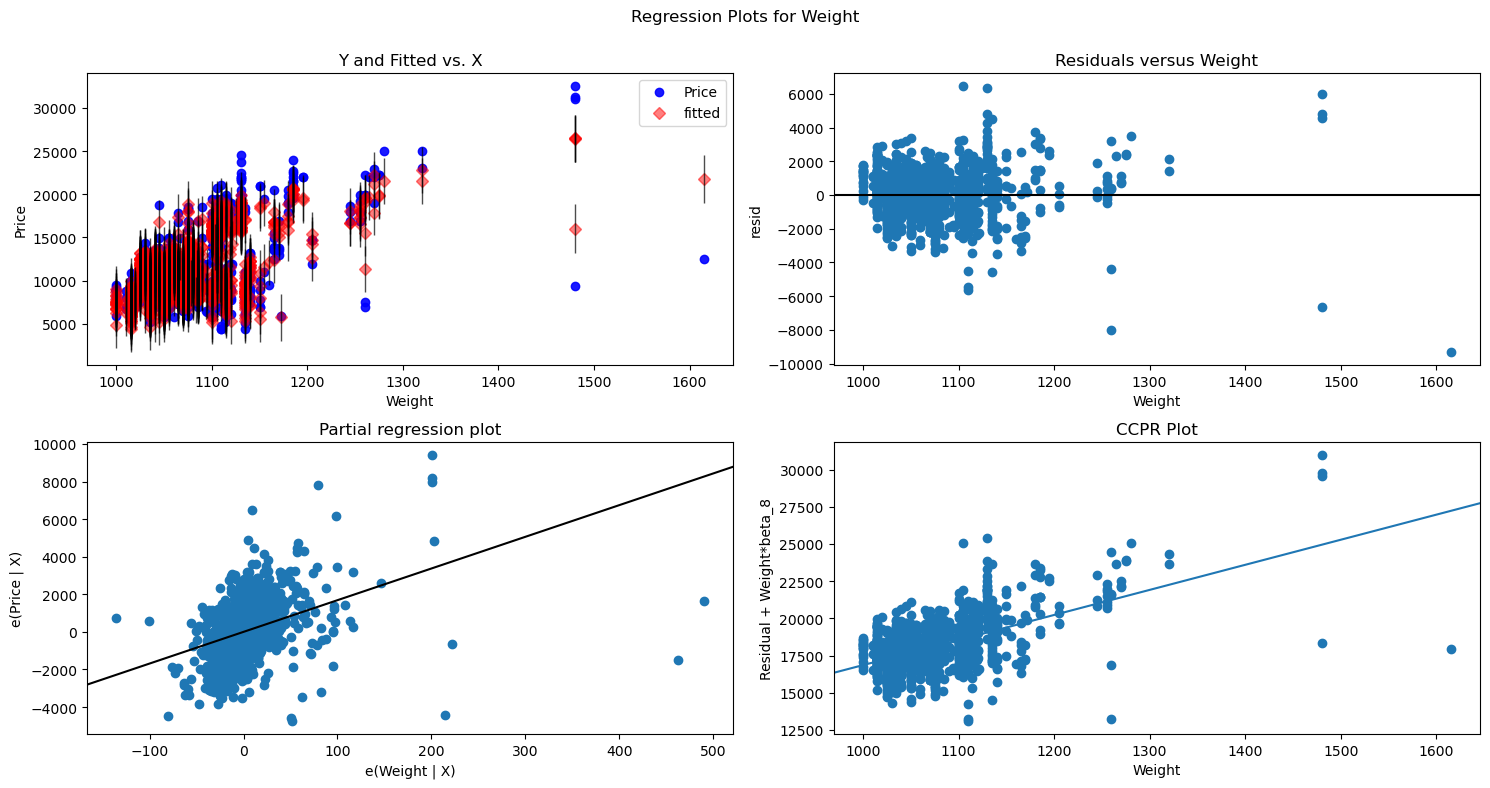

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Cooks Distance (detecting outliers)

In [50]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

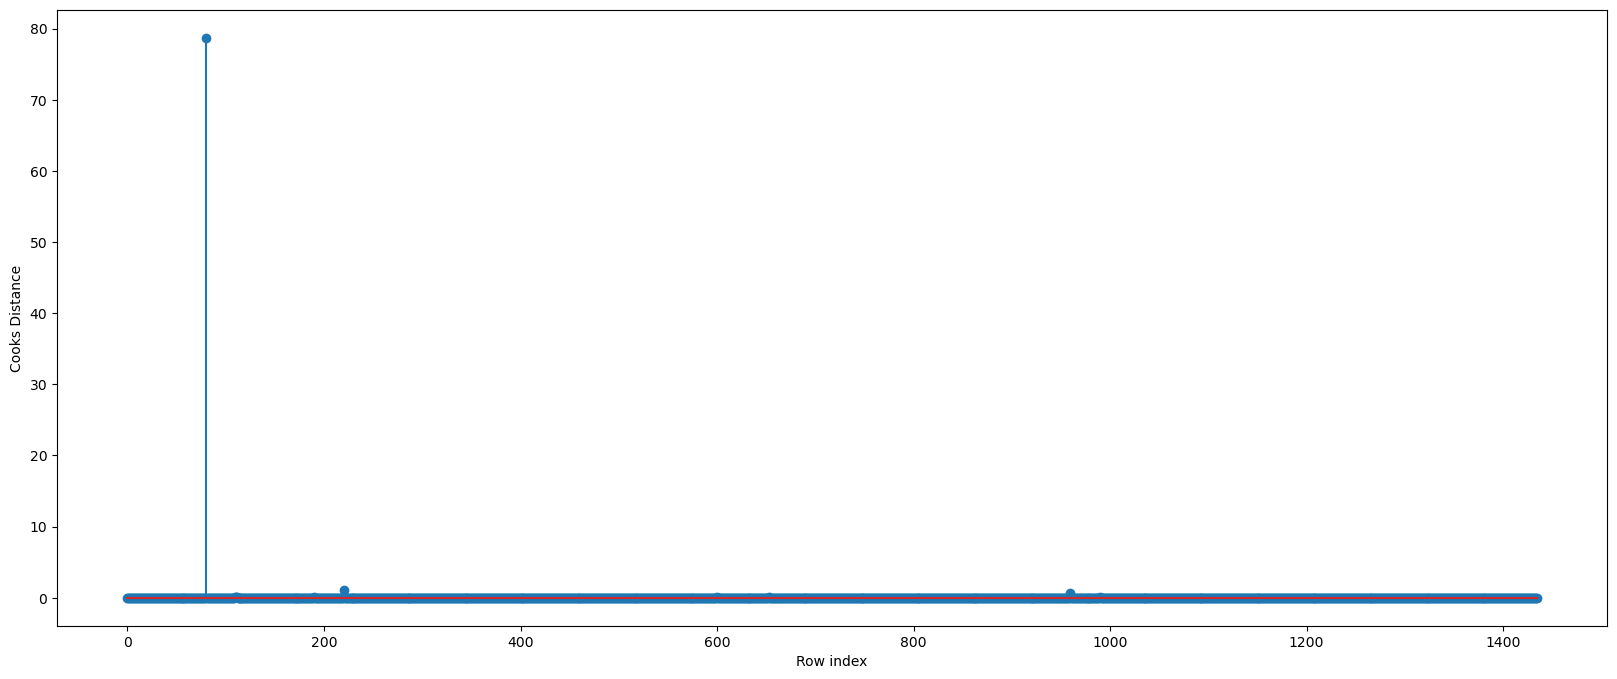

In [53]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 8))
plt.stem(np.arange(len(toyoto)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [54]:
(np.argmax(c),np.max(c))

(80, 78.72950582248677)

# High Influence Plots

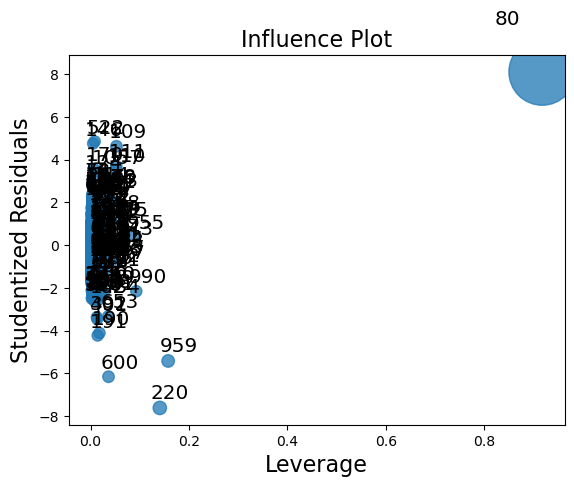

In [55]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [56]:
k = toyoto.shape[1]
n = toyoto.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [57]:
leverage_cutoff 

0.020905923344947737

from the above plot it is concluded that 80th observation is the outlier so we should be removing that observation for better results

In [62]:
toyoto[toyoto.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [64]:
Toyoto=toyoto.drop(toyoto.index[80],axis=0).reset_index()

In [66]:
Toyoto.drop(['index'],axis=1)

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Build Model

In [90]:
#Exclude variable "cc" and generate R-Squared and AIC values
modelnew=smf.ols('Price~Age+KM+HP+Doors+Gears+QT+Weight',data=Toyoto).fit()

In [91]:
modelnew.rsquared,modelnew.aic

(0.8619510191654681, 24732.881596284984)

In [92]:
#Exclude variable "gears" and generate R-Squared and AIC values
modelnew1=smf.ols('Price~Age+KM+HP+Doors+cc+QT+Weight',data=Toyoto).fit()

In [93]:
modelnew1.rsquared,modelnew1.aic

(0.8674247972580541, 24674.864102291154)

In [94]:
#Exclude variable "doors" and generate R-Squared and AIC values
modelnew2=smf.ols('Price~Age+KM+HP+cc+Gears+QT+Weight',data=Toyoto).fit()

In [95]:
modelnew2.rsquared,modelnew2.aic

(0.8680741306155819, 24667.823330034196)

By above models we can say that modelnew2 has higher rsquared value and lower aic value , so we remove doors from the model for better results 

In [96]:
#now finding cooks distance for the new model to detect outliers/influencers
modelnew2_influence= modelnew2.get_influence()
(c_V, _) = modelnew2_influence.cooks_distance

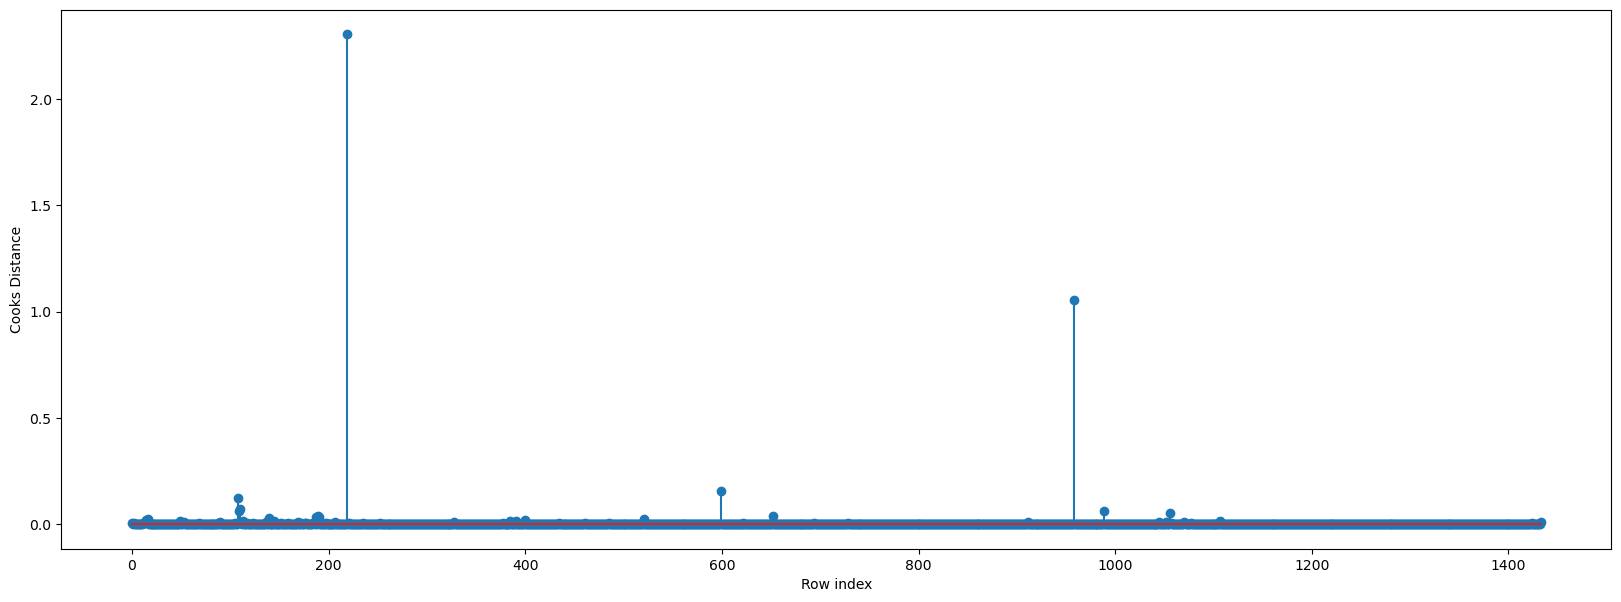

In [97]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Toyoto)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [99]:
(np.argmax(c_V),np.max(c_V))

(219, 2.3039534822944034)

In [100]:
#drop the 219 observation
Toyoto=Toyoto.drop(Toyoto.index[219],axis=0).reset_index()

In [106]:
Toyoto=Toyoto.drop(['level_0'],axis=1)

In [107]:
Toyoto

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [112]:
modelnew2=smf.ols('Price~Age+KM+HP+cc+Gears+QT+Weight',data=Toyoto).fit()

In [113]:
#Again check for influencers
modelnew2_influence= modelnew2.get_influence()
(cV, _) = modelnew2_influence.cooks_distance

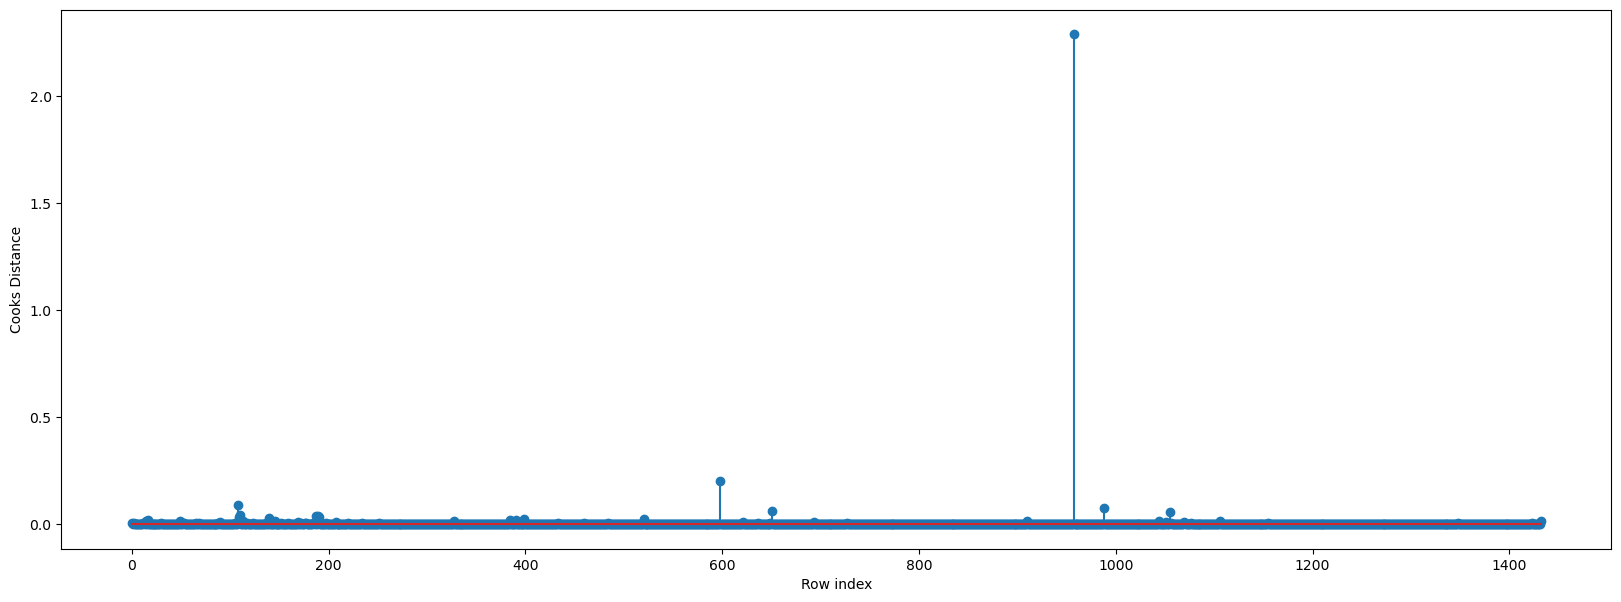

In [114]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Toyoto)),np.round(cV,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [115]:
np.argmax(cV),np.max(cV)

(957, 2.2890482552972737)

In [116]:
#drop the 957 observation
Toyoto=Toyoto.drop(Toyoto.index[957],axis=0).reset_index()

In [119]:
Toyoto=Toyoto.drop(['index'],axis=1)

In [120]:
#Since the value is <1 , we can stop the diagnostic process and finalize the model

In [121]:
#Check the accuracy of the model
final_model=smf.ols('Price~Age+KM+HP+cc+Gears+QT+Weight',data=Toyoto).fit()
final_model.rsquared,final_model.aic

(0.8831056250413848, 24461.845000292233)

# Predicting for new data

In [122]:
new_data=pd.DataFrame({'Age':30,"KM":95,"HP":102,"cc":35,"Gears":45,"QT":30,"Weight":45},index=[1])

In [123]:
final_model.predict(new_data)

1    13327.855884
dtype: float64

In [124]:
pred_y = final_model.predict(Toyoto)

In [125]:
pred_y

0       16192.554974
1       15746.258459
2       16170.822941
3       15837.767454
4       15697.459551
            ...     
1427     9024.411979
1428     8421.389876
1429     8567.959734
1430     8682.129197
1431    10681.447575
Length: 1432, dtype: float64